# 🏡 London Housing Data Analysis

## Project Objective 🎯
The goal of this project is to analyze the London housing data to uncover trends and insights regarding housing prices, sales, and crime rates. This analysis will help real estate professionals and policymakers understand the factors influencing housing markets and identify areas for potential investment or intervention.


## 1. Loading and Setup ⚙️
We begin by importing the necessary libraries and loading the dataset into a Pandas DataFrame.

In [13]:
import pandas as pd

In [15]:
import matplotlib.pyplot as plt

In [17]:
import seaborn as sns

In [19]:
import numpy as np

#### Set the style for the plots

In [81]:
sns.set(style="whitegrid")

### Load the dataset

In [58]:
data = pd.read_csv(r"C:\Users\LENOVO\Desktop\Python Data Analysis\Housing+Data.csv")

#### Display the first few rows of the dataset

In [23]:
data.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,01/01/1995,city of london,91449,E09000001,17.0,NaN
1,02/01/1995,city of london,82203,E09000001,7.0,NaN
2,03/01/1995,city of london,79121,E09000001,14.0,NaN
3,04/01/1995,city of london,77101,E09000001,7.0,NaN
4,05/01/1995,city of london,84409,E09000001,10.0,NaN


## 2. Data Overview 🧐

#### Display basic information about the dataset

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 635.2+ KB


#### Display summary statistics

In [31]:
data.describe(include='all')

,date,area,average_price,code,houses_sold,no_of_crimes
count,13549,13549,1.354900e+04,13549,13455.000000,7439.000000
unique,301,45,NaN,45,NaN,NaN
top,04/01/1998,hackney,NaN,E09000012,NaN,NaN
freq,47,302,NaN,302,NaN,NaN
mean,NaN,NaN,2.635197e+05,NaN,3893.994129,2158.352063
std,NaN,NaN,1.876175e+05,NaN,12114.402476,902.087742
min,NaN,NaN,4.072200e+04,NaN,2.000000,0.000000
25%,NaN,NaN,1.323800e+05,NaN,247.000000,1623.000000
50%,NaN,NaN,2.229190e+05,NaN,371.000000,2132.000000
75%,NaN,NaN,3.368430e+05,NaN,3146.000000,2582.000000


## 3. Data Cleaning 🧹

### 3.1 Handling Missing Values 🚮

#### Check for missing values

In [37]:
data.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

#### Drop rows with missing values

In [40]:
data_cleaned = data.dropna()

### 3.2 Correcting Data Types 🔄

#### Convert 'date' column to datetime format

In [62]:
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])

#### Convert 'houses_sold' and 'no_of_crimes' to integers if appropriate

In [60]:
data_cleaned['houses_sold'] = data_cleaned['houses_sold'].astype(int)

In [64]:
data_cleaned['no_of_crimes'] = data_cleaned['no_of_crimes'].astype(int)

### 4. Data Analysis 🔍

### Analysis of minimum and maximum housing prices

In [72]:
min_price = data['average_price'].min()

In [74]:
max_price = data['average_price'].max()

In [76]:
print(f"Minimum Average Price: £{min_price}")

Minimum Average Price: £40722


In [168]:
print("\n")

In [78]:
print(f"Maximum Average Price: £{max_price}\n")

Maximum Average Price: £1463378



### Analysis of minimum and maximum houses sold

In [89]:
min_houses_sold = data['houses_sold'].min()

In [91]:
max_houses_sold = data['houses_sold'].max()

In [93]:
print(f"Minimum Houses Sold: {min_houses_sold}")

Minimum Houses Sold: 2.0


In [170]:
print("\n")

In [95]:
print(f"Maximum Houses Sold: {max_houses_sold}\n")

Maximum Houses Sold: 132163.0



### Analysis of minimum and maximum crime data

In [98]:
min_crimes = data['no_of_crimes'].min()

In [100]:
max_crimes = data['no_of_crimes'].max()

In [102]:
print(f"Minimum Number of Crimes: {min_crimes}")

Minimum Number of Crimes: 0.0


In [172]:
print("\n")

In [104]:
print(f"Maximum Number of Crimes: {max_crimes}\n")

Maximum Number of Crimes: 7461.0



### Mean values for comparison

In [107]:
mean_price = data['average_price'].mean()

In [109]:
mean_houses_sold = data['houses_sold'].mean()

In [111]:
mean_crimes = data['no_of_crimes'].mean()

In [113]:
print(f"Overall Mean Average Price: £{mean_price}")

Overall Mean Average Price: £263519.68433094694


In [174]:
print("\n")

In [115]:
print(f"Overall Mean Number of Houses Sold: {mean_houses_sold}")

Overall Mean Number of Houses Sold: 3893.9941285767372


### Grouping data by 'area' to calculate total crimes 

In [138]:
crimes_per_area = data_cleaned.groupby('area')['no_of_crimes'].sum()

In [197]:
crimes_per_area

area
barking and dagenham       362895
barnet                     516539
bexley                     294564
brent                      548243
bromley                    458385
camden                     693550
city of london                 47
croydon                    601696
ealing                     591712
enfield                    470718
greenwich                  488898
hackney                    584414
hammersmith and fulham     434698
haringey                   546107
harrow                     284803
havering                   347256
hillingdon                 485962
hounslow                   462654
islington                  571144
kensington and chelsea     415624
kingston upon thames       224944
lambeth                    713668
lewisham                   521253
merton                     274384
newham                     647126
redbridge                  440355
richmond upon thames       236300
southwark                  687435
sutton                     244440
tower ham

### Visualization of Crimes Distribution Per Area

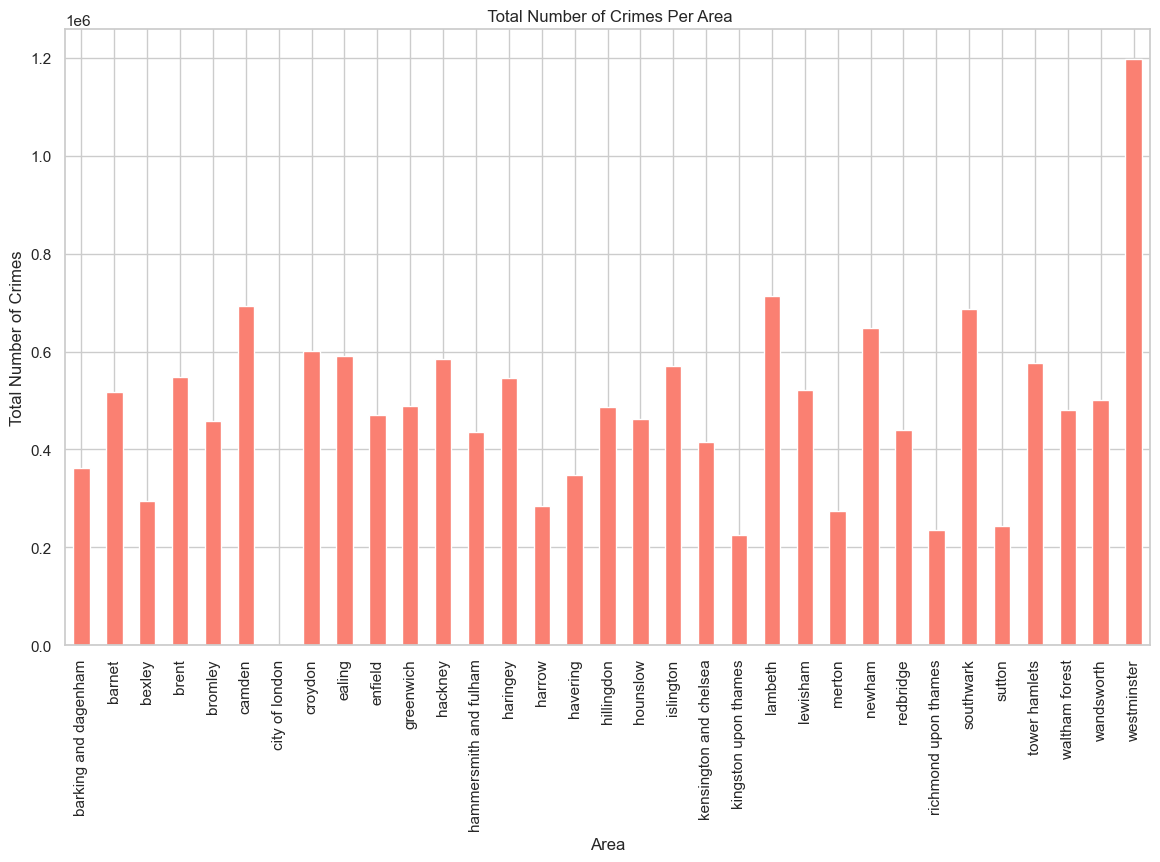

In [142]:
plt.figure(figsize=(14, 8))
crimes_per_area.plot(kind='bar', color='salmon')
plt.title(' Total Number of Crimes Per Area')
plt.xlabel('Area')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=90)
plt.show()

In [124]:
print("\n")

In [126]:
print(crime_distribution.tail(10))  # Bottom 10 areas with the lowest crime rates

area
east midlands           0.0
east of england         0.0
south east              0.0
south west              0.0
inner london            0.0
outer london            0.0
north west              0.0
north east              0.0
london                  0.0
yorks and the humber    0.0
Name: no_of_crimes, dtype: float64


In [176]:
print("\n")

### Grouping data by 'area' to calculate total  houses sold

In [144]:
houses_sold_per_area = data_cleaned.groupby('area')['houses_sold'].sum()

In [195]:
houses_sold_per_area

area
barking and dagenham       45712
barnet                     95739
bexley                     71576
brent                      56862
bromley                   110245
camden                     53279
city of london              2824
croydon                   105603
ealing                     78070
enfield                    80629
greenwich                  73788
hackney                    50108
hammersmith and fulham     53402
haringey                   56709
harrow                     56324
havering                   72130
hillingdon                 75491
hounslow                   62014
islington                  51512
kensington and chelsea     51350
kingston upon thames       54117
lambeth                    86528
lewisham                   79943
merton                     62242
newham                     62986
redbridge                  73699
richmond upon thames       68933
southwark                  75387
sutton                     65511
tower hamlets              78487
walth

### Visualization of Houses Sold Per Area

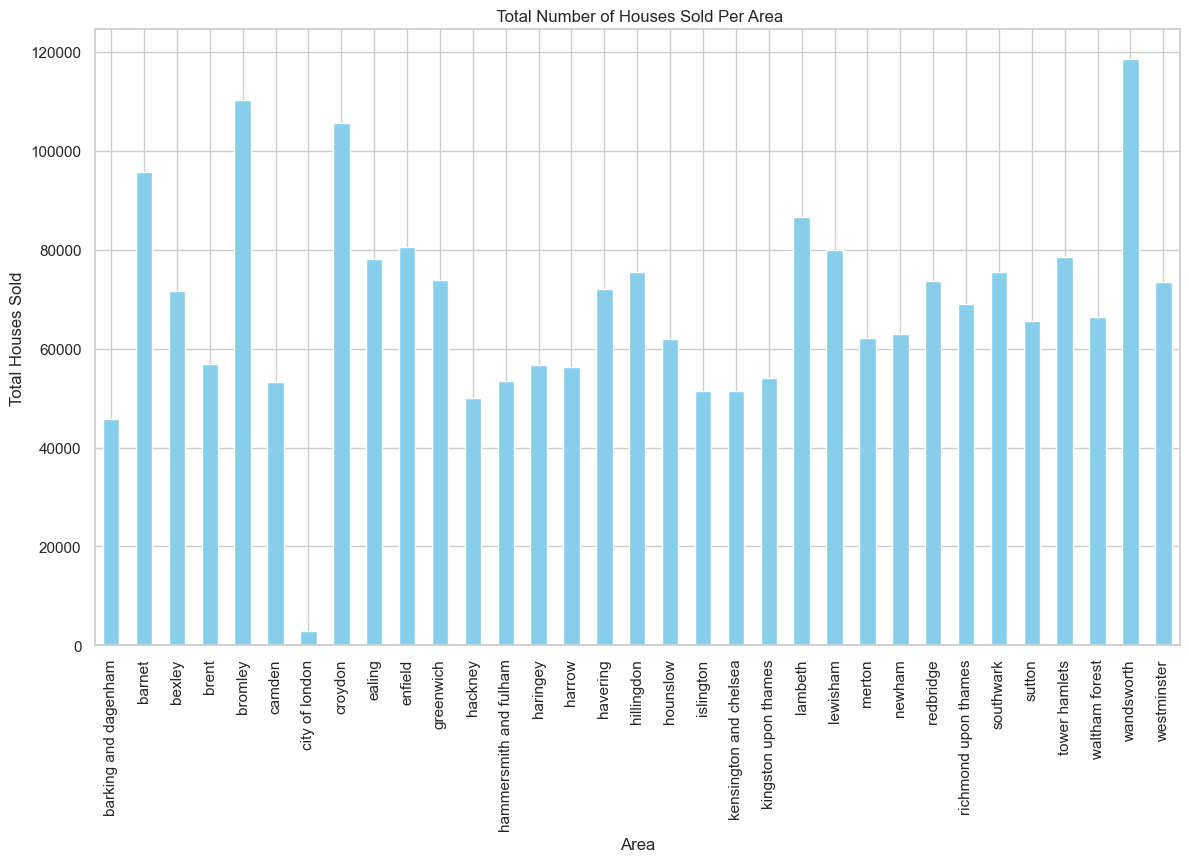

In [148]:
plt.figure(figsize=(14, 8))
houses_sold_per_area.plot(kind='bar', color='skyblue')
plt.title(' Total Number of Houses Sold Per Area')
plt.xlabel('Area')
plt.ylabel('Total Houses Sold')
plt.xticks(rotation=90)
plt.show()

In [178]:
print("\n")

### Grouping by date to get the total number of crimes over time

In [150]:
crime_over_time = data_cleaned.groupby('date')['no_of_crimes'].sum()

### Visualization: Total Number of Crimes Over Time

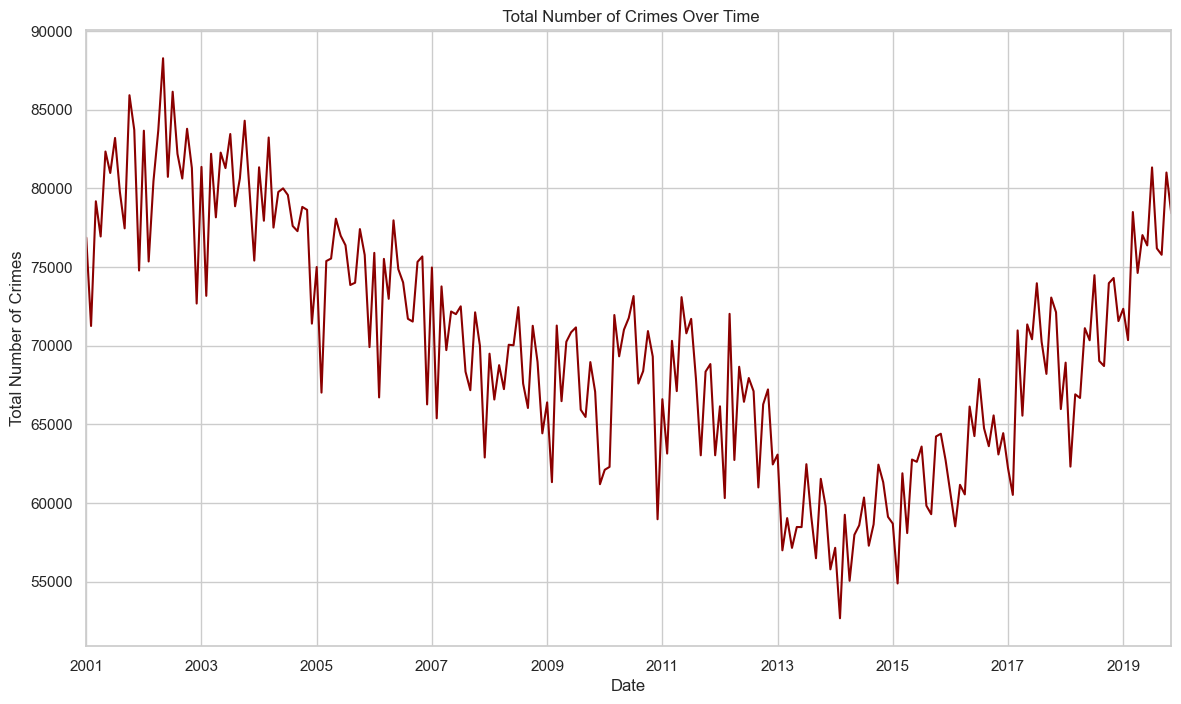

In [154]:
plt.figure(figsize=(14, 8))
crime_over_time.plot(kind='line', color='darkred')
plt.title(' Total Number of Crimes Over Time')
plt.xlabel('Date')
plt.ylabel('Total Number of Crimes')
plt.grid(True)
plt.show()

In [180]:
print("\n")

### Grouping by date to get the total number of houses sold over time

In [158]:
houses_sold_over_time = data_cleaned.groupby('date')['houses_sold'].sum()

### Visualization: Total Number of Houses Sold Over Time

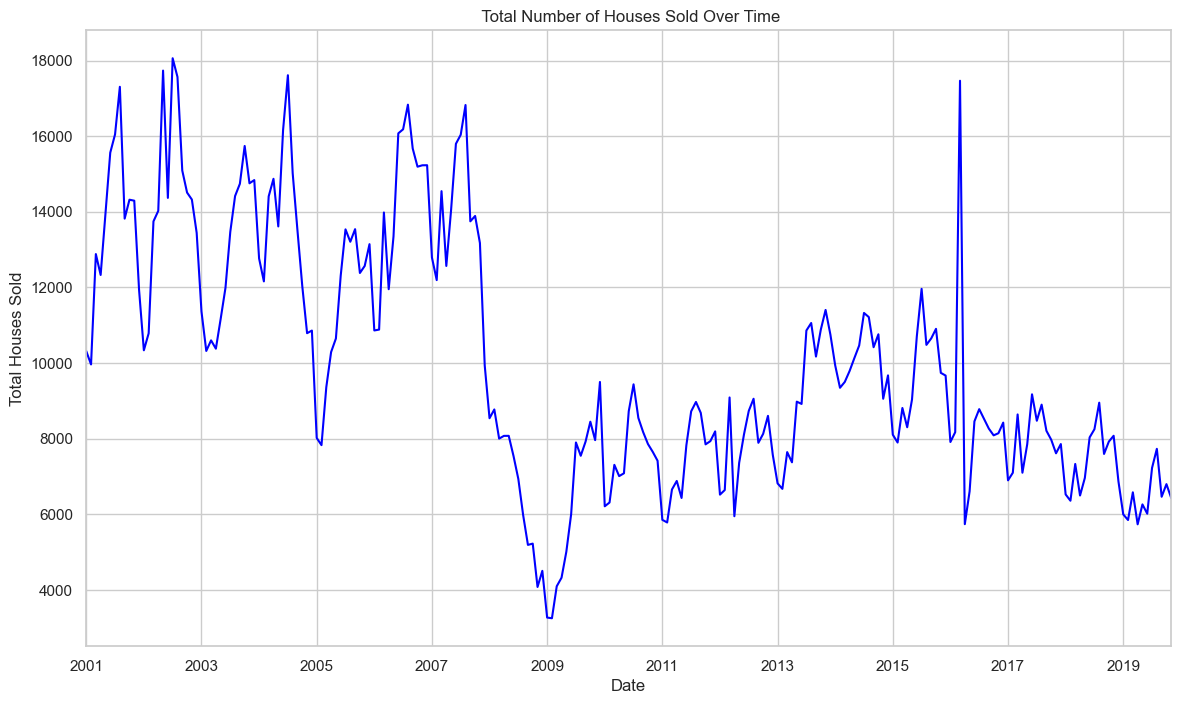

In [160]:
plt.figure(figsize=(14, 8))
houses_sold_over_time.plot(kind='line', color='blue')
plt.title(' Total Number of Houses Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Total Houses Sold')
plt.grid(True)
plt.show()

In [216]:
print("\n")

### Analysis of House Prices Per Area Over Time

In [203]:
price_per_area_over_time = data.groupby(['date', 'area'])['average_price'].mean().reset_index()

In [247]:
price_per_area_over_time.head(10)

,date,area,average_price
0,01/01/1995,barking and dagenham,50460.0
1,01/01/1995,barnet,93285.0
2,01/01/1995,bexley,64958.0
3,01/01/1995,brent,71307.0
4,01/01/1995,bromley,81671.0
5,01/01/1995,camden,120933.0
6,01/01/1995,city of london,91449.0
7,01/01/1995,croydon,69158.0
8,01/01/1995,ealing,79886.0
9,01/01/1995,east midlands,45545.0


In [223]:
price_per_area_over_time.tail(10)

,date,area,average_price
13535,12/01/2019,south east,324515.0
13536,12/01/2019,south west,259011.0
13537,12/01/2019,southwark,505619.0
13538,12/01/2019,sutton,374700.0
13539,12/01/2019,tower hamlets,457893.0
13540,12/01/2019,waltham forest,439009.0
13541,12/01/2019,wandsworth,604056.0
13542,12/01/2019,west midlands,199814.0
13543,12/01/2019,westminster,968404.0
13544,12/01/2019,yorks and the humber,166932.0


### Analysis for Areas with Highest and Lowest Prices

#### Convert 'average_price' to numeric 

In [227]:
data['average_price'] = pd.to_numeric(data['average_price'], errors='coerce')

In [229]:
data.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

#### Group by 'area' and calculate the average house price

In [231]:
average_prices_per_area = data.groupby('area')['average_price'].mean().reset_index()

#### Rename columns for clarity

In [233]:
average_prices_per_area.columns = ['Area', 'Average_Price']

In [235]:
average_prices_per_area.head()

,Area,Average_Price
0,barking and dagenham,159852.930233
1,barnet,304991.089701
2,bexley,189570.737542
3,brent,270291.252492
4,bromley,254160.621262


#### Identify the area with the highest average price

In [237]:
highest_price_area = average_prices_per_area.loc[average_prices_per_area['Average_Price'].idxmax()]

#### Identify the area with the lowest average price

In [239]:
lowest_price_area = average_prices_per_area.loc[average_prices_per_area['Average_Price'].idxmin()]

In [241]:
highest_price_area, lowest_price_area

(Area             kensington and chelsea
 Average_Price             742060.368771
 Name: 23, dtype: object,
 Area               north east
 Average_Price    97041.076412
 Name: 30, dtype: object)

#### Visualize the highest and lowest average house prices.

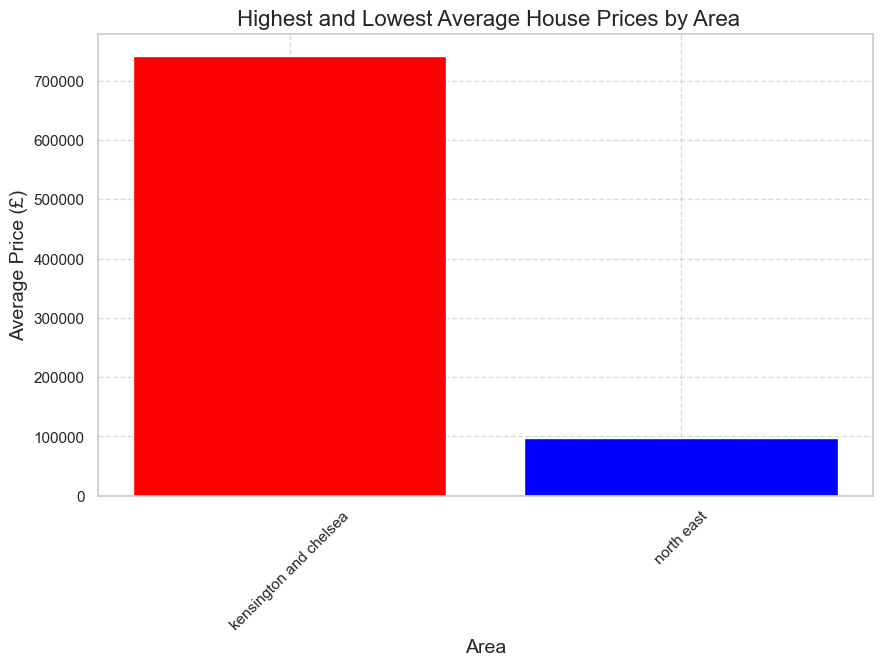

In [245]:
plt.figure(figsize=(10, 6))
extreme_prices = pd.DataFrame([highest_price_area, lowest_price_area])
plt.bar(extreme_prices['Area'], extreme_prices['Average_Price'], color=['red', 'blue'])
plt.title(' Highest and Lowest Average House Prices by Area', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Average Price (£)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

## 📝 Conclusion
This comprehensive analysis of the London housing market provides valuable insights into housing prices, sales activity, and crime statistics across different areas. By leveraging these insights, clients can make well-informed decisions regarding property investments and purchases. The data highlights the diversity in the housing market and underscores the importance of considering both price and safety factors.
